# HSE 2023: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (0.5 points)
* [Task 4](#task3) (1 points)
* [Task 5](#task4) (0.5 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Load the file `data_Mar_64.txt`.

In [1]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

0         1         2         3         4         5         6   \
0  Acer Campestre  0.003906  0.003906  0.027344  0.033203  0.007812  0.017578   
1  Acer Campestre  0.005859  0.013672  0.027344  0.025391  0.013672  0.029297   
2  Acer Campestre  0.011719  0.001953  0.027344  0.044922  0.017578  0.042969   
3  Acer Campestre  0.013672  0.011719  0.037109  0.017578  0.011719  0.087891   
4  Acer Campestre  0.007812  0.009766  0.027344  0.025391  0.001953  0.005859   

         7         8         9   ...        55        56        57        58  \
0  0.023438  0.005859  0.000000  ...  0.011719  0.000000  0.005859  0.035156   
1  0.019531  0.000000  0.001953  ...  0.017578  0.000000  0.021484  0.017578   
2  0.023438  0.000000  0.003906  ...  0.035156  0.000000  0.015625  0.021484   
3  0.023438  0.000000  0.000000  ...  0.015625  0.001953  0.021484  0.029297   
4  0.015625  0.000000  0.005859  ...  0.023438  0.001953  0.021484  0.048828   

         59        60        61        62        63   64  
0  0.027344  0.033203  0.001953  0.000000  0.017578  0.0  
1  0.046875  0.005859  0.003906  0.003906  0.046875  0.0  
2  0.056641  0.009766  0.003906  0.000000  0.015625  0.0  
3  0.033203  0.003906  0.000000  0.001953  0.027344  0.0  
4  0.056641  0.019531  0.000000  0.000000  0.013672  0.0  

[5 rows x 65 columns]

This [dataset](https://archive.ics.uci.edu/dataset/241/one+hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK.

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [2]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [3]:
import numpy as np

X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [4]:
## your code here
from sklearn.preprocessing import LabelEncoder
labenca = LabelEncoder()
# фиттим транформим y_name
y = labenca.fit_transform(y_name)

Split your data into **train** and **test** keeping 30% for the test.

In [5]:
## your code here
from sklearn.model_selection import train_test_split

# как в прошлых домашках делаем
# keeping 30% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Train SVM with linear kernel on your data to predict target. Calculate accuracy, F-score. Also print out confusion matrix

In [6]:
## your code here
# все нужные импорты
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# трейним SVM с помощью linear kernel
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)


y_predi = model_svm.predict(X_test)

In [7]:
# подсчет метрик
accur_score = accuracy_score(y_test, y_predi)
# дурак нельзя переопределять f1_score создадим тогда приппсику var
f1_score_var = f1_score(y_test, y_predi, average='weighted')
matr_confuz = confusion_matrix(y_test, y_predi)

print(f"Accuracy: {accur_score:.4f}")
print(f"F1 Score: {f1_score_var:.4f}")
print("Confusion Matrix:")
print(matr_confuz)

Accuracy: 0.0063
F1 Score: 0.0037
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [3 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=1`

In [8]:
## your code here
from sklearn.decomposition import PCA

# PCA для уменьшения размерности до двух
pca_model = PCA(n_components=2, random_state=1)
X_pca = pca_model.fit_transform(X)

Select objects that match values from 0 to 15 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<=15]` to the `scatter` method.

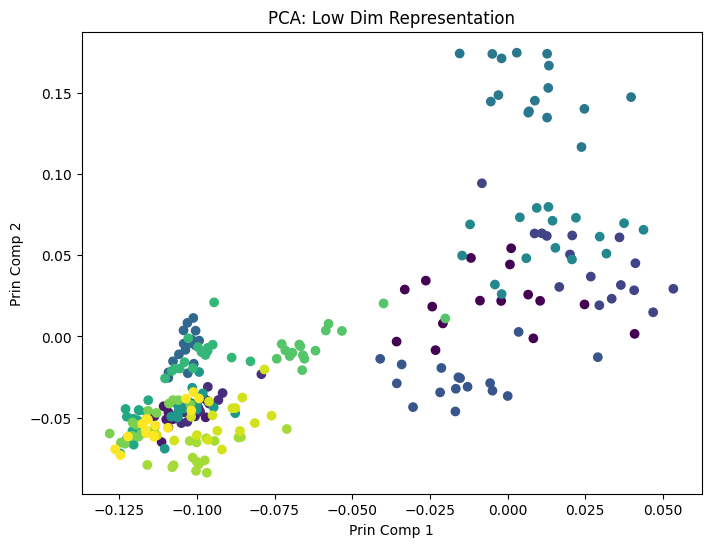

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

sel_ind = (y <= 15)
# изобразим наш график
plt.figure(figsize=(8, 6))
# исходя из нашего условия
plt.scatter(X_pca[sel_ind, 0], X_pca[sel_ind, 1], c=y[sel_ind], cmap='viridis')
plt.title('PCA: Low Dim Representation')
plt.xlabel('Prin Comp 1')
plt.ylabel('Prin Comp 2')
plt.show()

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

In [10]:
## your code here
from sklearn.manifold import TSNE

# t-SNE для уменьшения размерности до двух
tsne_model = TSNE(n_components=2, random_state=1)
X_tsne = tsne_model.fit_transform(X)

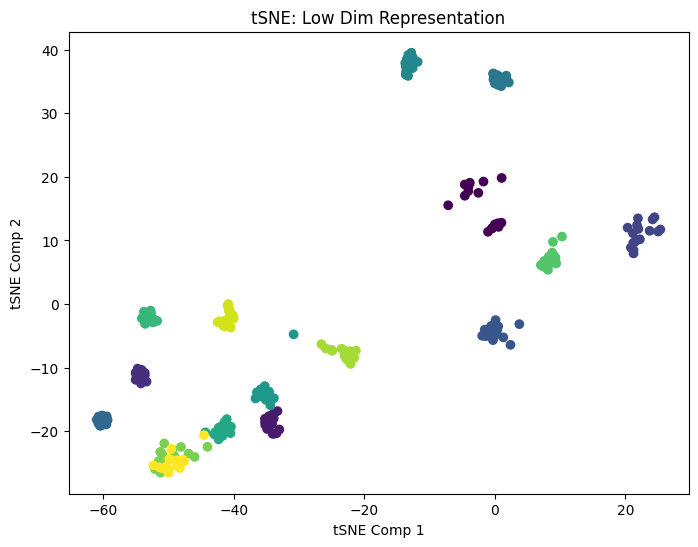

In [11]:
sel_ind = (y <= 15)
# изобразим наш график
plt.figure(figsize=(8, 6))
# исходя из нашего условия
plt.scatter(X_tsne[sel_ind, 0], X_tsne[sel_ind, 1], c=y[sel_ind], cmap='viridis')
plt.title('tSNE: Low Dim Representation')
plt.xlabel('tSNE Comp 1')
plt.ylabel('tSNE Comp 2')
plt.show()

**Task 2. <a id="task2"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the TSNE method. Round the numbers to hundreds.

In [12]:
## your code here
# что просили то и сделали
coords_2_tsne = X_tsne[2, :].round(2)
print("Coordinates of object with index 2 after t-SNE:")
print(coords_2_tsne)

Coordinates of object with index 2 after t-SNE:
[ 0.57 12.13]


**Task 3. <a id="task3"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the PCA method. Round the numbers to hundreds.

In [13]:
## your code here
# по аналогии сделали и специфировалм
coords_2_pca = X_pca[2, :].round(2)
print("Coordinates of object with index 2 after PCA:")
print(coords_2_pca)

Coordinates of object with index 2 after PCA:
[-0.03  0.03]


**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

##your answer here ^_^
Правильным ответом является номер 3

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

Хотя насчет PCA я очпень долго сомневался, но визуально видно отличие по цветам хоть и располагается близко очень

**Task 5. (0.5 points)** Again try to fit your simple classifier, this time using transformed data to two-dimensional space. To do it choose the best feature representation in your opinion from two existing. Did the metrics improve?

In [14]:
## your code here

# треним уже на transformed data с учетом svm linear
model_svmpca = SVC(kernel='linear', random_state=42)
model_svmpca.fit(X_pca, y)
model_svmtsne = SVC(kernel='linear', random_state=42)
model_svmtsne.fit(X_tsne, y)

# предсказываем на тесте использкя нашу transformed data
y_predi_onpca = model_svmpca.predict(X_test[:, :2])
y_predi_ontsne = model_svmtsne.predict(X_test[:, :2])

# подсчет метрик на нашей transformed data
pca_accur = accuracy_score(y_test, y_predi_onpca)
# теперь все должно работать
# вляпался в tyoe error
pca_f1 = f1_score(y_test, y_predi_onpca, average='weighted')
tsne_accur = accuracy_score(y_test, y_predi_ontsne)
tsne_f1 = f1_score(y_test, y_predi_ontsne, average='weighted')

# вывод метрик и осмотр на улучшение
print("Metrics for SVM using PCA-transformed data:")
print(f"Accuracy: {pca_accur:.4f}")
print(f"F1 Score: {pca_f1:.4f}")
print("\n")
print("Metrics for SVM using t-SNE-transformed data:")
print(f"Accuracy: {tsne_accur:.4f}")
print(f"F1 Score: {tsne_f1:.4f}")

Metrics for SVM using PCA-transformed data:
Accuracy: 0.0146
F1 Score: 0.0068


Metrics for SVM using t-SNE-transformed data:
Accuracy: 0.0125
F1 Score: 0.0003


С учетом ранее сделанных замеров исследований и нынешних можно судить о том, что метрики улучшилитсь и это заметно на лицо

## K_means

**Task 6. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [15]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin

def plot_clust(X, centers, lables, ax):
    ax.scatter(X[:,0], X[:,1], c=lables)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None
        self.centers = None
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        ## your code here
        # проежим по кластерам и сравним с метками и потом мин сделаем
        centers = np.array([X[self.labels == iter].mean(axis=0) for iter in range(self.n_clusters)])
        return centers

    def update_labels(self, X):
        ## your code here
        # теперь восоплльзуемся функцией и найдем расстояние минимальное между
        # точкой и множеством точек
        labels = pairwise_distances_argmin(X, self.centers)
        return labels

    def fit(self, X):
        self.centers = X[np.random.choice(len(X), self.n_clusters, replace=False)]
        self.labels = self.update_labels(X)

        for it in range(self.n_iters):
            new_labels = self.update_labels(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                fig, ax = plt.subplots(1,1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0

            self.centers = new_centers

            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3);
            clear_output(wait=True);


        return 1

    def predict(self, X):
        # аналогично с update labelos
        labels = pairwise_distances_argmin(X, self.centers)
        return labels

Generating data for clustering

In [16]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [17]:
X, y = noisy_blobs

**Task 7. <a id="task6"></a> (1.5 points)**

7.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=3`. Plot result. Specify the result label for the object with index 0.

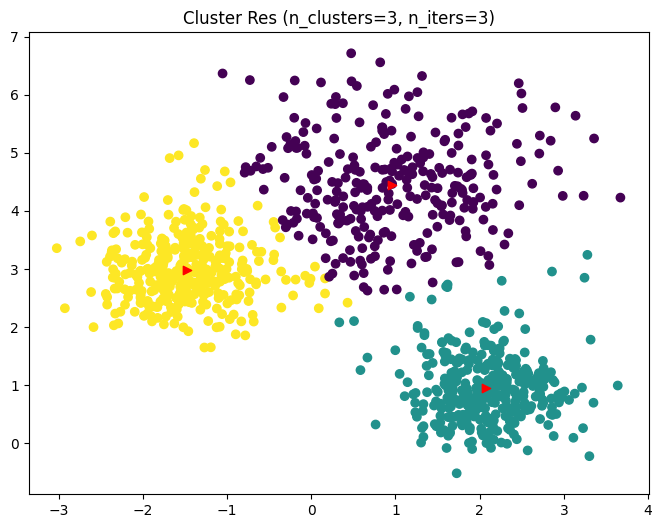

Res label for object with index 0: 2


In [18]:
## your code here
kmeans_71_model = MyKMeans(n_clusters=3, n_iters=3, seed=42)
convergence_71_model = kmeans_71_model.fit(X)

# запечатлим
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_clust(X, kmeans_71_model.centers, kmeans_71_model.labels, ax)
plt.title("Cluster Res (n_clusters=3, n_iters=3)")
plt.show()

# делаем как просят в подпункте Specify the result label for the object with index 0
result_label_71 = kmeans_71_model.predict(X[0].reshape(1, -1))[0]
print(f"Res label for object with index 0: {result_label_71}")

7.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 100`. Plot result. Specify the result label for the object with index 0.

Converge by tolerance centers


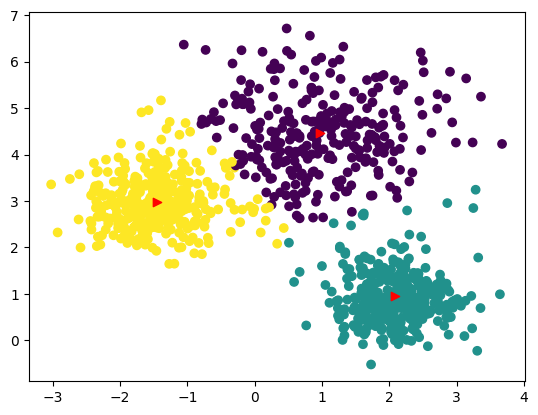

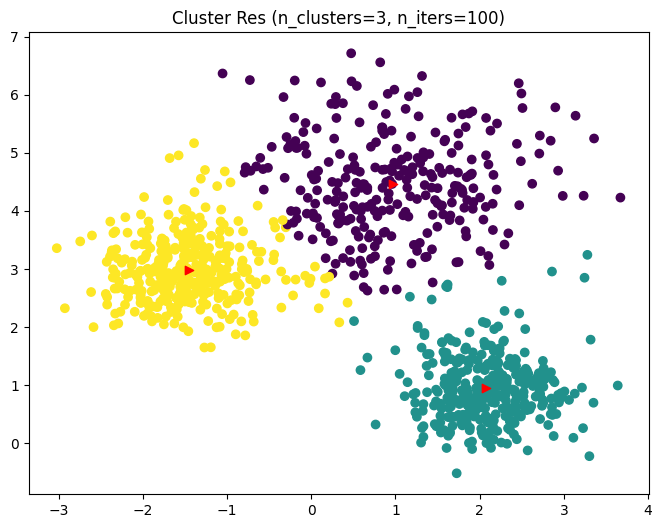

Res label for object with index 0: 2


In [19]:
# your code here
kmeans_72_model = MyKMeans(n_clusters=3, n_iters=100, seed=42)
convergence_72_model = kmeans_72_model.fit(X)

# запечатлим
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_clust(X, kmeans_72_model.centers, kmeans_72_model.labels, ax)
plt.title("Cluster Res (n_clusters=3, n_iters=100)")
plt.show()

# делаем как просят в подпункте Specify the result label for the object with index 0
result_label_72 = kmeans_72_model.predict(X[0].reshape(1, -1))[0]
print(f"Res label for object with index 0: {result_label_72}")

я не знаю почему выводится еще один график пред этим

7.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 3 to 100

In [20]:
## your code here
# отчитываемся о количестве замен
num_of_changed = np.sum(kmeans_71_model.labels != kmeans_72_model.labels)
print(f"Num of objects with changed labels: {num_of_changed}")

Num of objects with changed labels: 4


**Task 8. <a id="task6"></a> (1.5 points)**

Using the elbow method, select the optimal number of clusters, show it on the plot. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them divided by number of clusters. To do this, iterate the parameter k from 2 to 50 in steps of 2.

Converge by tolerance centers


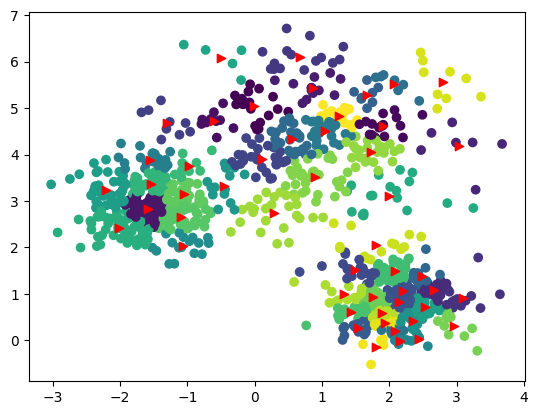

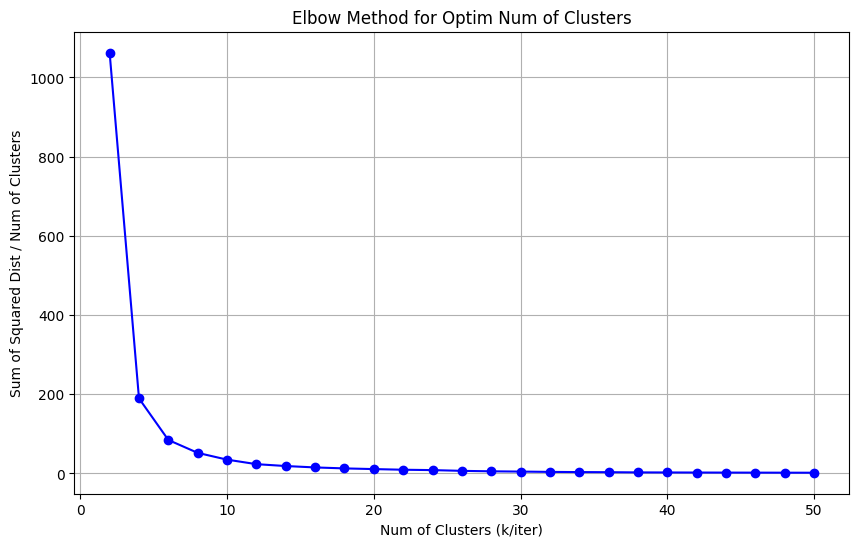

In [21]:
## your code here
iner_val_hran = []

# итерируемся через разные значения iter param вместо k мне так нравится
for iter in range(2, 51, 2):
    # запоминаем потом фитим
    kmeans_elbow = MyKMeans(n_clusters=iter, n_iters=100, seed=42)
    kmeans_elbow.fit(X)
    # сохраняем для графика
    iner_val_hran.append(np.sum((X - kmeans_elbow.centers[kmeans_elbow.labels]) ** 2) / iter)

# теперь изобразим что вышло
plt.figure(figsize=(10, 6))
plt.plot(range(2, 51, 2), iner_val_hran, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optim Num of Clusters')
plt.xlabel('Num of Clusters (k/iter)')
plt.ylabel('Sum of Squared Dist / Num of Clusters')
plt.grid(True)
plt.show()


## DBSCAN

**Task 9. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.3` hyperparameter. Plot result. Specify the response for the object with index 2.

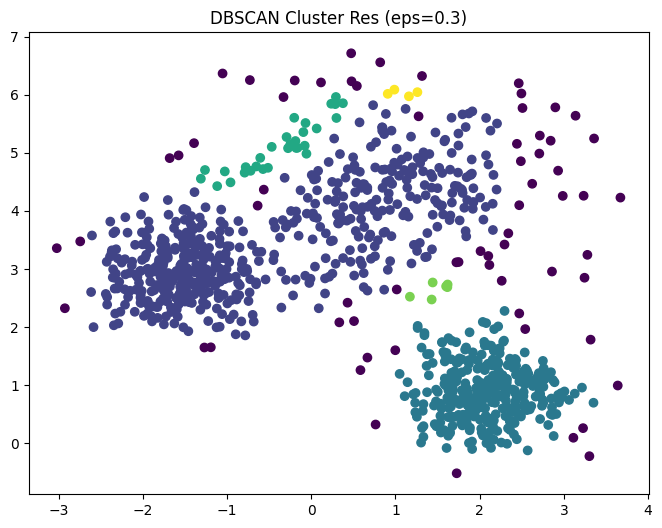

Res label for object with index 2: 0


In [22]:
## your code here
from sklearn.cluster import DBSCAN

# добавили новую модель ток код скопировали из других ячеек ипоменяли красиво
dbscan_model = DBSCAN(eps=0.3)
labels_inda_dbscan = dbscan_model.fit_predict(X)

# запечатлим
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=labels_inda_dbscan, cmap='viridis')
plt.title("DBSCAN Cluster Res (eps=0.3)")
plt.show()

# что просят по заданию Specify the result for the object with index 2
result_dbscan_under_index_2 = labels_inda_dbscan[2]
print(f"Res label for object with index 2: {result_dbscan_under_index_2}")

**Task 10. <a id="task8"></a> (1 point)**

Try different settings of ```eps``` distances (from 0.1 to 0.5) and several values of your choice of ```min_samples```. For each setting plot results. Also output the number of clusters and outliers (objects marked as -1).

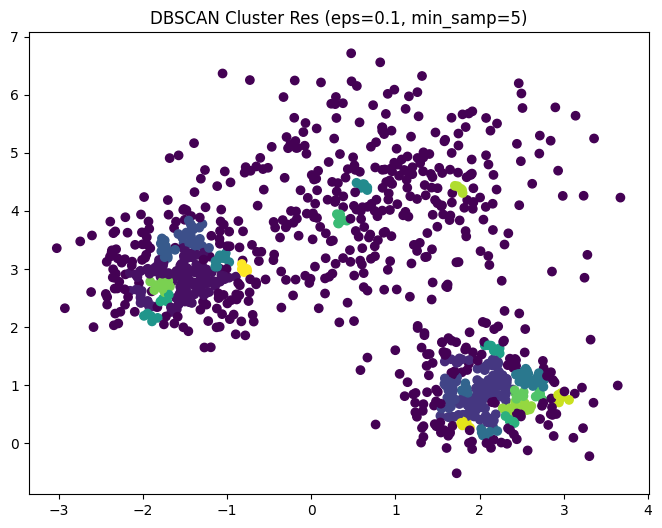

Params: eps=0.1, min_samp=5
Num of Clusters: 25
Num of Outliers: 567


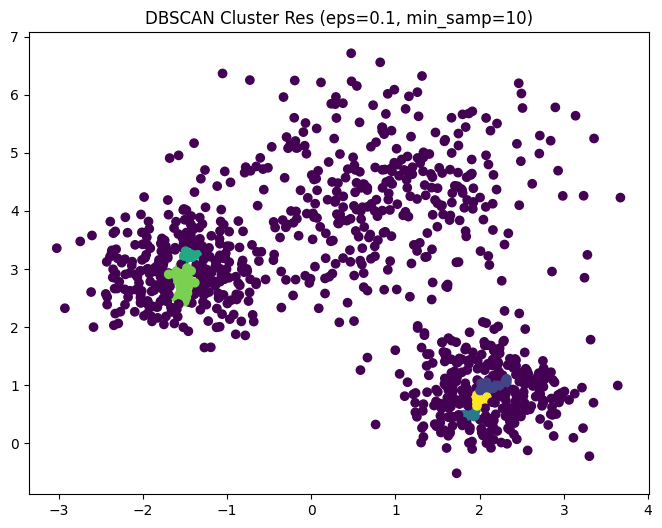

Params: eps=0.1, min_samp=10
Num of Clusters: 5
Num of Outliers: 902


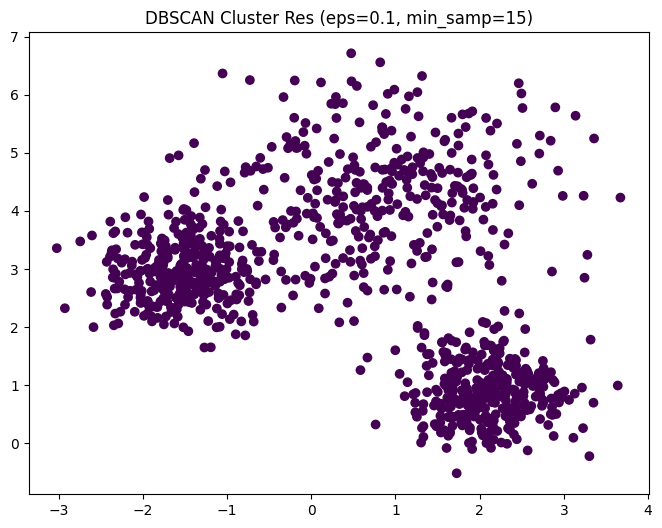

Params: eps=0.1, min_samp=15
Num of Clusters: 0
Num of Outliers: 1000


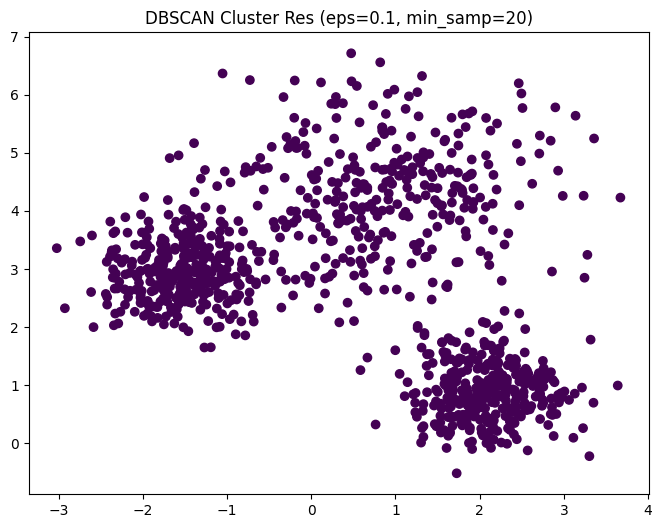

Params: eps=0.1, min_samp=20
Num of Clusters: 0
Num of Outliers: 1000


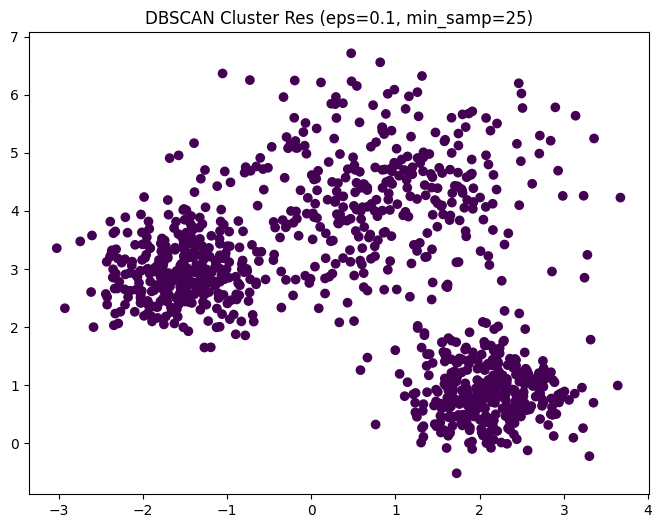

Params: eps=0.1, min_samp=25
Num of Clusters: 0
Num of Outliers: 1000


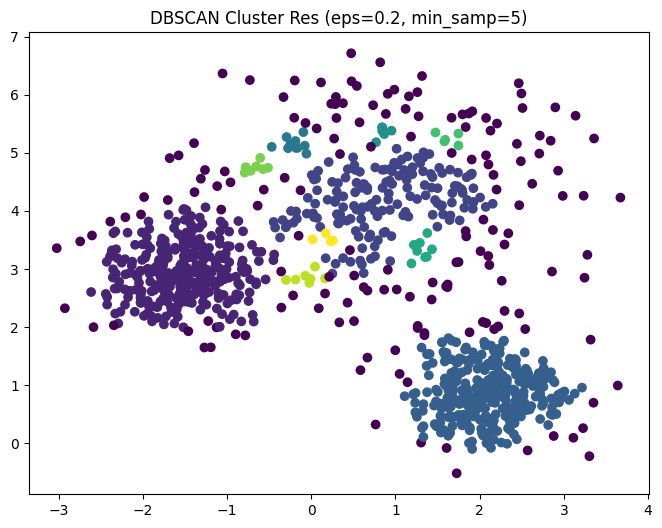

Params: eps=0.2, min_samp=5
Num of Clusters: 10
Num of Outliers: 161


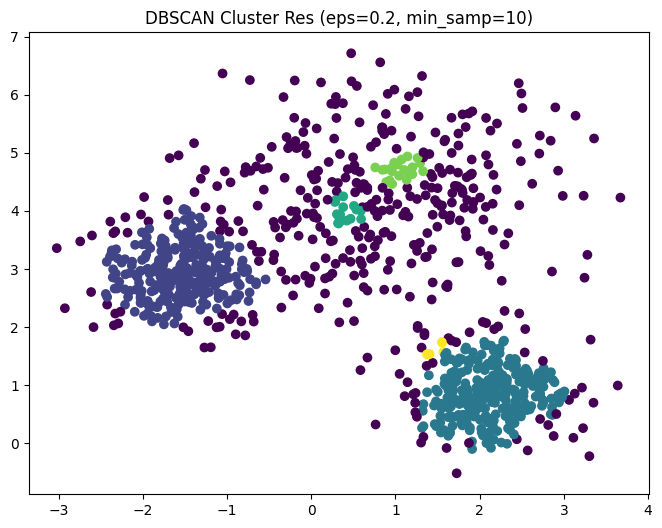

Params: eps=0.2, min_samp=10
Num of Clusters: 5
Num of Outliers: 387


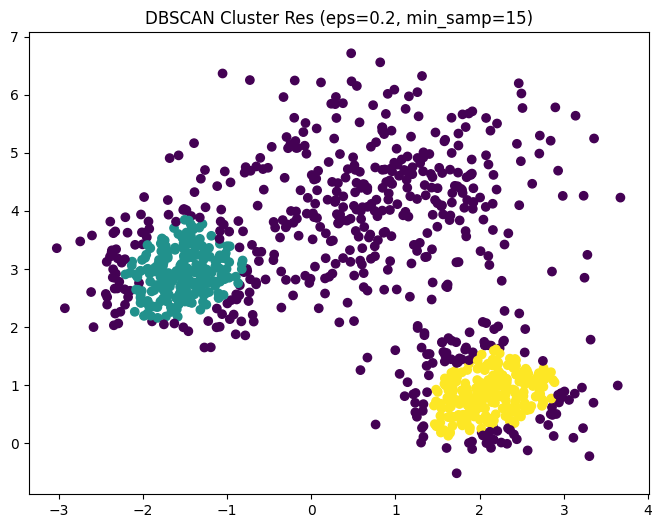

Params: eps=0.2, min_samp=15
Num of Clusters: 2
Num of Outliers: 536


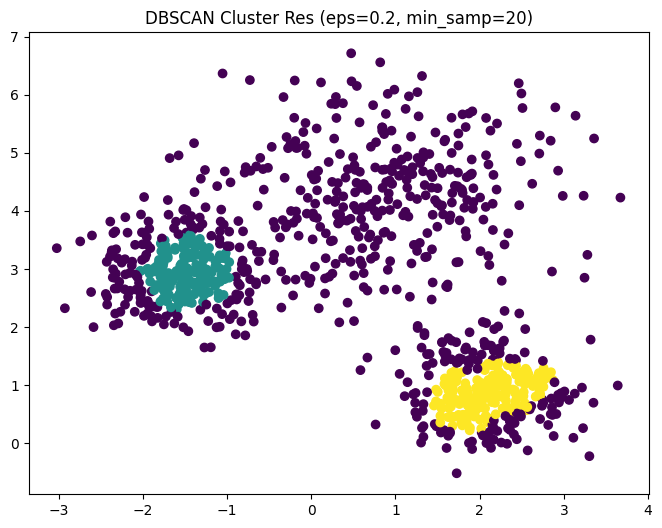

Params: eps=0.2, min_samp=20
Num of Clusters: 2
Num of Outliers: 632


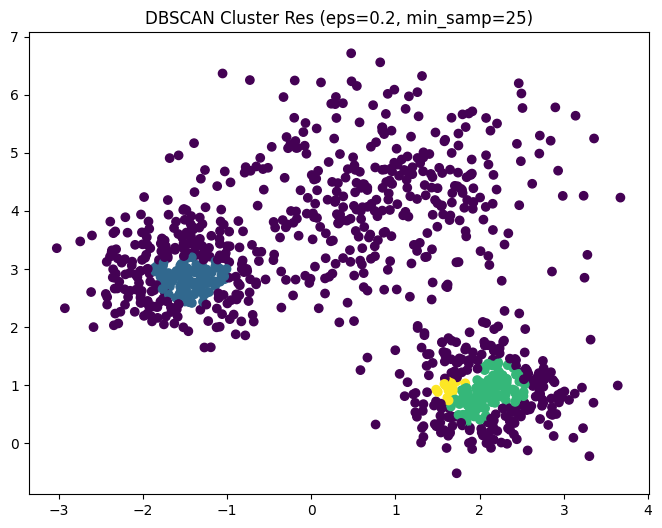

Params: eps=0.2, min_samp=25
Num of Clusters: 3
Num of Outliers: 764


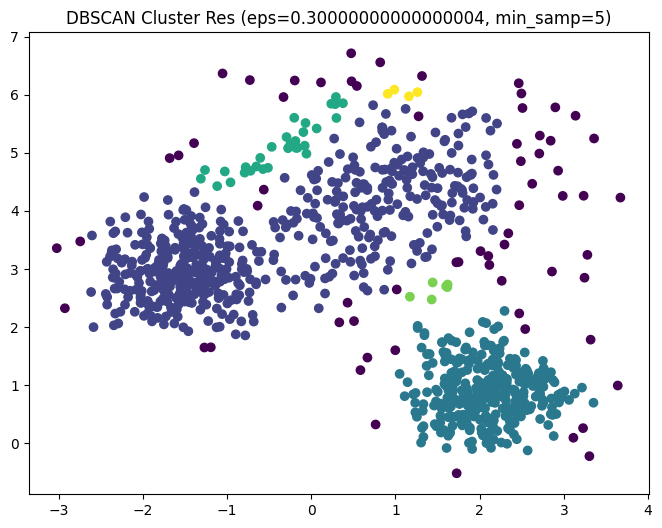

Params: eps=0.30000000000000004, min_samp=5
Num of Clusters: 5
Num of Outliers: 65


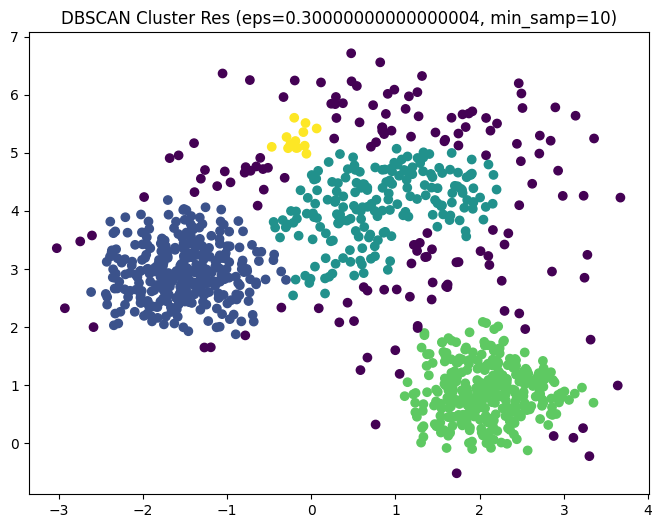

Params: eps=0.30000000000000004, min_samp=10
Num of Clusters: 4
Num of Outliers: 145


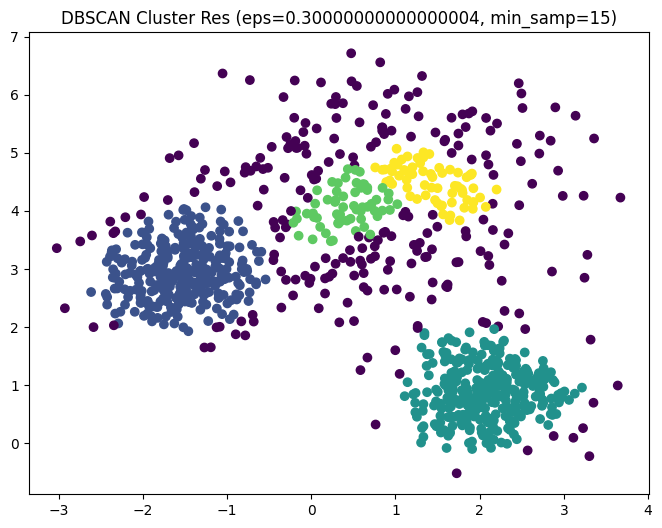

Params: eps=0.30000000000000004, min_samp=15
Num of Clusters: 4
Num of Outliers: 241


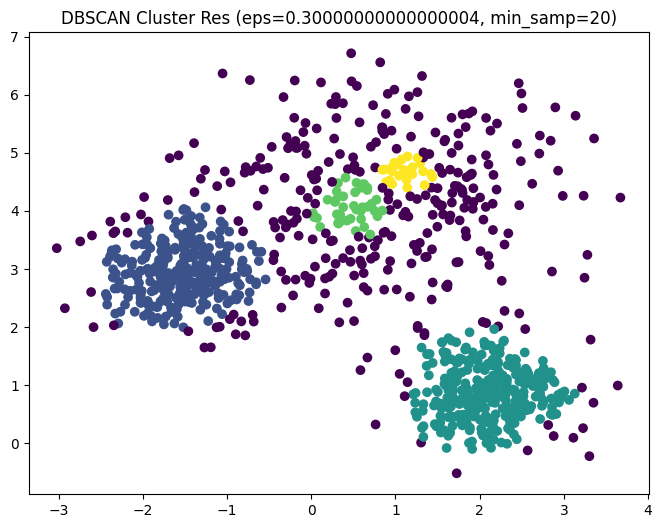

Params: eps=0.30000000000000004, min_samp=20
Num of Clusters: 4
Num of Outliers: 319


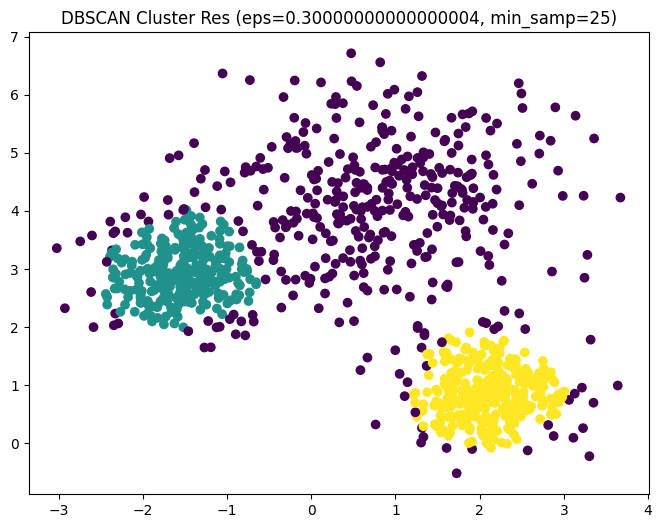

Params: eps=0.30000000000000004, min_samp=25
Num of Clusters: 2
Num of Outliers: 410


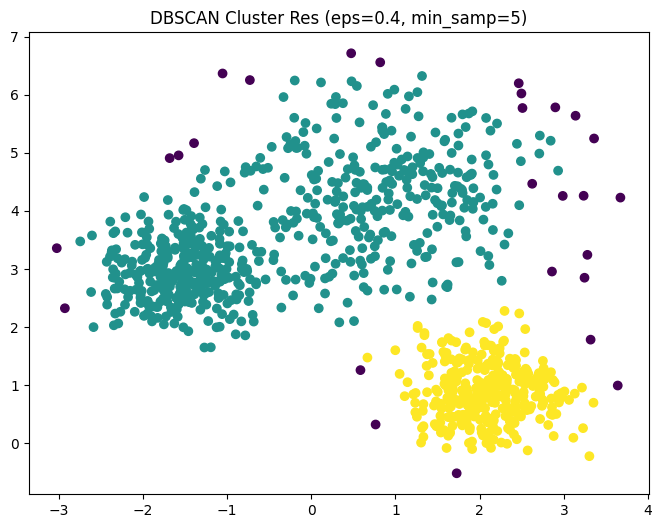

Params: eps=0.4, min_samp=5
Num of Clusters: 2
Num of Outliers: 27


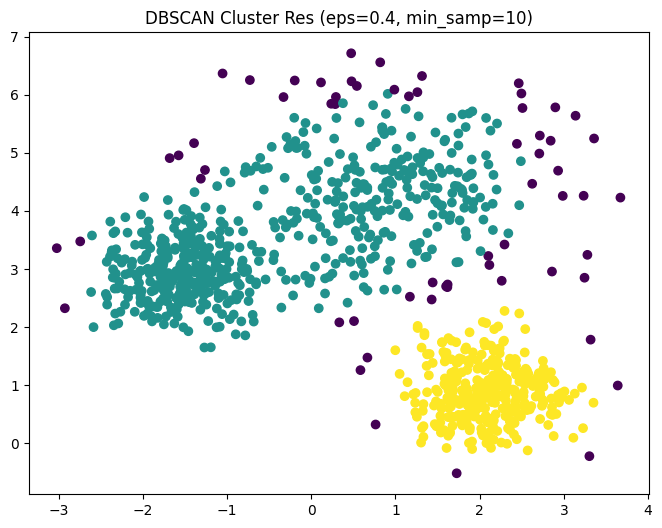

Params: eps=0.4, min_samp=10
Num of Clusters: 2
Num of Outliers: 61


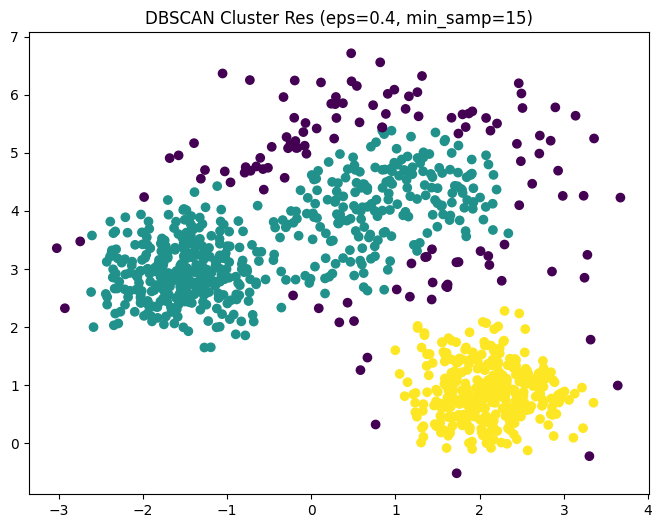

Params: eps=0.4, min_samp=15
Num of Clusters: 2
Num of Outliers: 119


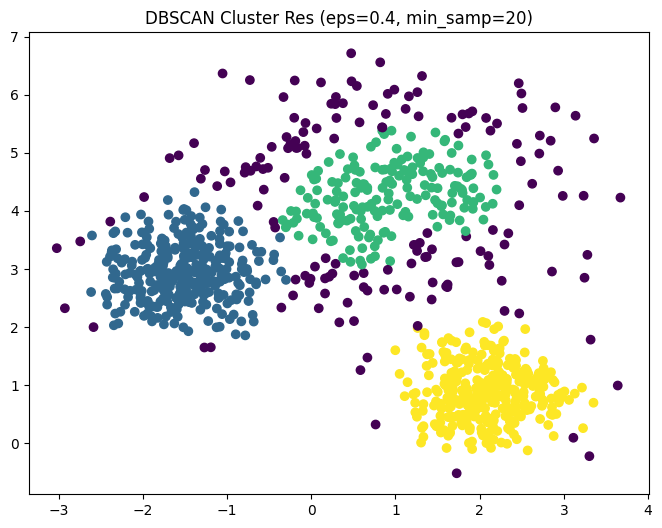

Params: eps=0.4, min_samp=20
Num of Clusters: 3
Num of Outliers: 157


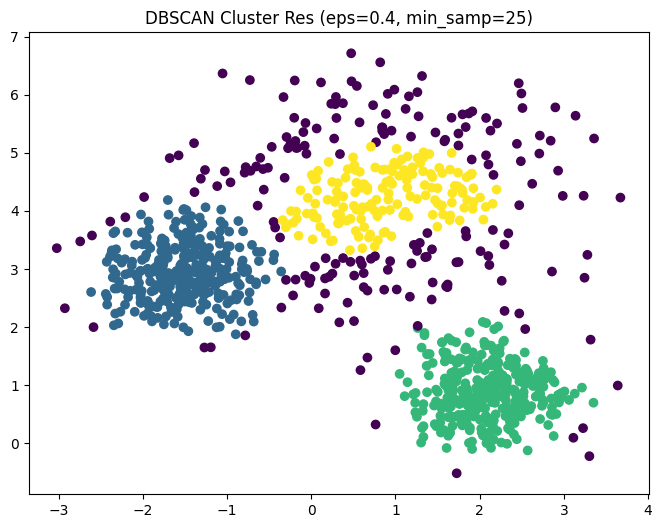

Params: eps=0.4, min_samp=25
Num of Clusters: 3
Num of Outliers: 188


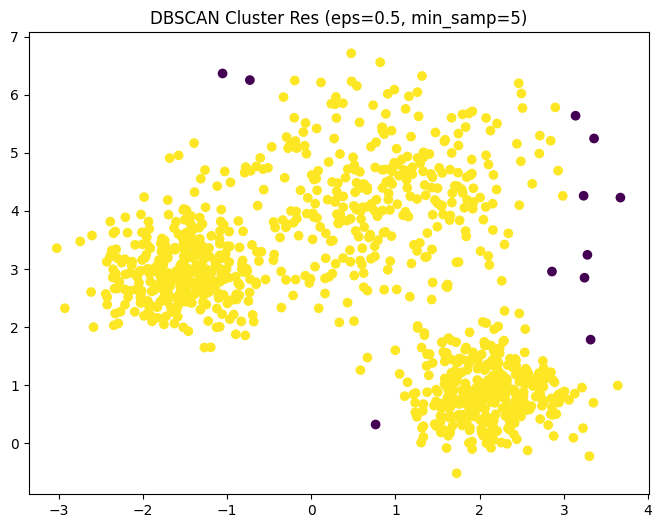

Params: eps=0.5, min_samp=5
Num of Clusters: 1
Num of Outliers: 11


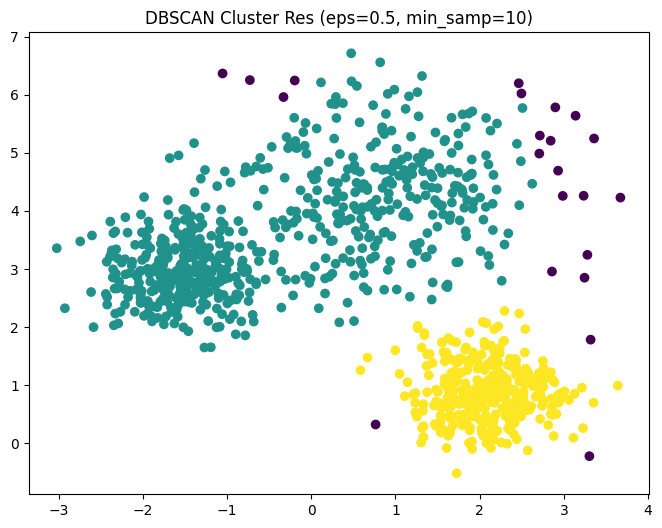

Params: eps=0.5, min_samp=10
Num of Clusters: 2
Num of Outliers: 22


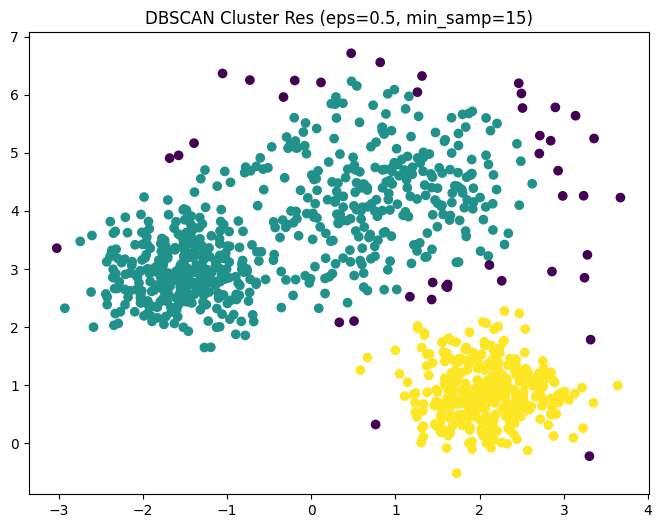

Params: eps=0.5, min_samp=15
Num of Clusters: 2
Num of Outliers: 42


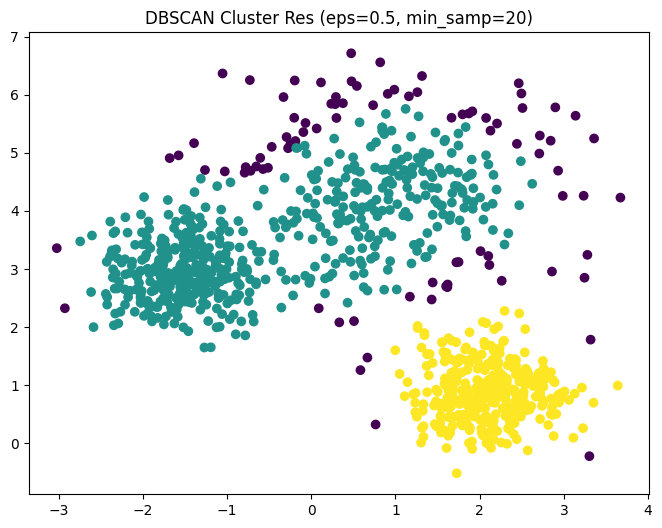

Params: eps=0.5, min_samp=20
Num of Clusters: 2
Num of Outliers: 87


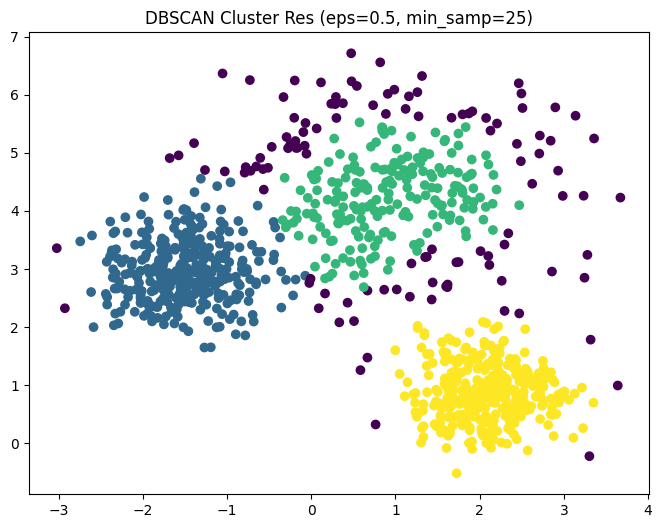

Params: eps=0.5, min_samp=25
Num of Clusters: 3
Num of Outliers: 113


In [23]:
## your code here
eps_val = np.arange(0.1, 0.6, 0.1)
minsamp_val = [iter for iter in range(5, 30, 5)]

# пробежимся и просмотрим все
for eps in eps_val:
    for min_samp in minsamp_val:
        # из прошлых ячеек
        dbscan_params = DBSCAN(eps=eps, min_samples=min_samp)
        labels_params = dbscan_params.fit_predict(X)

        # посчитаем кол-во кластеров и выбросов
        kol_clusters = len(set(labels_params))
        kol_clusters -= (1 if -1 in labels_params else 0)
        kol_outliers = np.sum(labels_params == -1)

        # Plot the result делаем как просим
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        ax.scatter(X[:, 0], X[:, 1], c=labels_params, cmap='viridis')
        plt.title(f"DBSCAN Cluster Res (eps={eps}, min_samp={min_samp})")
        plt.show()

        # Output the number of clusters and outliers все по зданию и по госту
        print(f"Params: eps={eps}, min_samp={min_samp}")
        print(f"Num of Clusters: {kol_clusters}")
        print(f"Num of Outliers: {kol_outliers}")
        # для красоты, в аду сегодня жарко
        print("=" * 70)